# Подготовительные моменты

Подключение необходимых библиотек.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
                              HistGradientBoostingClassifier, RandomForestClassifier)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Создание DataFrame из csv-файла с данными о телефонах.

In [2]:
phones = pd.read_csv("train.csv")

# Первый взгляд на набор данных

Набор данных о телефонах содержит следующие признаки:
- `battery_power` - ёмкость аккумулятора в мАч;
- `blue` - поддержка Bluetooth;
- `clock_speed` - скорость, с которой микропроцессор выполняет команды;
- `dual_sim` - поддержка двух sim-карт;
- `fc` - количество Мп фронтальной камеры;
- `four_g` - поддержка 4G;
- `int_memory` - объём встроенной памяти в Гб;
- `m_dep` - толщина телефона в см;
- `mobile_wt` - вес телефона в граммах;
- `n_cores` - количество ядер процессора;
- `pc` - количество Мп основной камеры;
- `px_height` - высота разрешения экрана в пикселях;
- `px_width` - ширина разрешения экрана в пикселях;
- `ram` - оперативная память в Мб;
- `sc_h` - высота экрана телефона в см;
- `sc_w` - ширина экрана телефона в см;
- `talk_time` - самый длительный срок службы одного заряда аккумулятора;
- `three_g` - поддержка 3G;
- `touch_screen` - наличие сенсорного экрана;
- `wifi` - поддержка Wi-Fi;
- `price_range` - ценовой диапозон.

Целевой признак `price_range`:
- 0 (низкая стоимость),
- 1 (средняя стоимость),
- 2 (высокая стоимость),
- 3 (очень высокая стоимость).

In [3]:
phones

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Просматриваем основные числовые характеристики количественных признаков, а именно для каждого столбца подсчитываются: количество непустых записей, среднее значение, среднее квадратическое отклонение, минимальное значение, первый квартиль, второй квартиль (медиана), третий квартиль и максимальное значение.

In [5]:
phones.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Пустых и нулевых значений нет. Также, набор данных целиком состоит из количественных признаков.

Посмотрим распределение телефонов по классам (ценовым диапозонам).

In [6]:
phones.price_range.value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


В наборе данных представлено 4 ценовых диапозона телефонов, равных по объёму.

# Подготовка к классификации с помощью деревьев решений

Отделение целевого признака — ценового диапозона.

In [7]:
y = phones.price_range
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


Копирование набора данных и удаление целевого признака из него.

In [8]:
X = phones.drop(columns=["price_range"])
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


Разделение набора данных на тренировочную и тестовую выборки.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Классификация с помощью деревьев решений

Обучим классификатор `DecisionTreeClassifier` на тренировочной выборке и посмотрим точность.

In [10]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7483333333333333

Предскажем классы телефонов тестовой выборки и посмотрим результаты для каждого из классов.

In [11]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       151
           1       0.63      0.76      0.69       135
           2       0.64      0.58      0.61       151
           3       0.82      0.83      0.82       163

    accuracy                           0.75       600
   macro avg       0.75      0.75      0.75       600
weighted avg       0.76      0.75      0.75       600



Исходя из полученных значений метрик, принадлежность к классам 0 и 3 предсказывается лучше, чем к 1 и 2.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

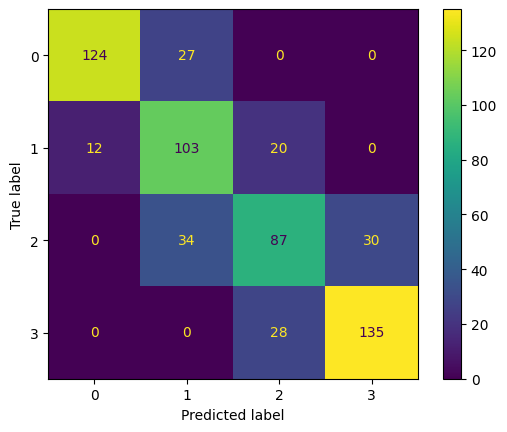

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что несколько телефонов каждого класса определяются в "соседние" классы, т. е. находятся на границе двух классов. Т. к. классы 0 и 3 являются "крайними" и имеют только одного "соседа", то для них точность определения лучше.

Интерпретируем и визуализируем обученную модель.

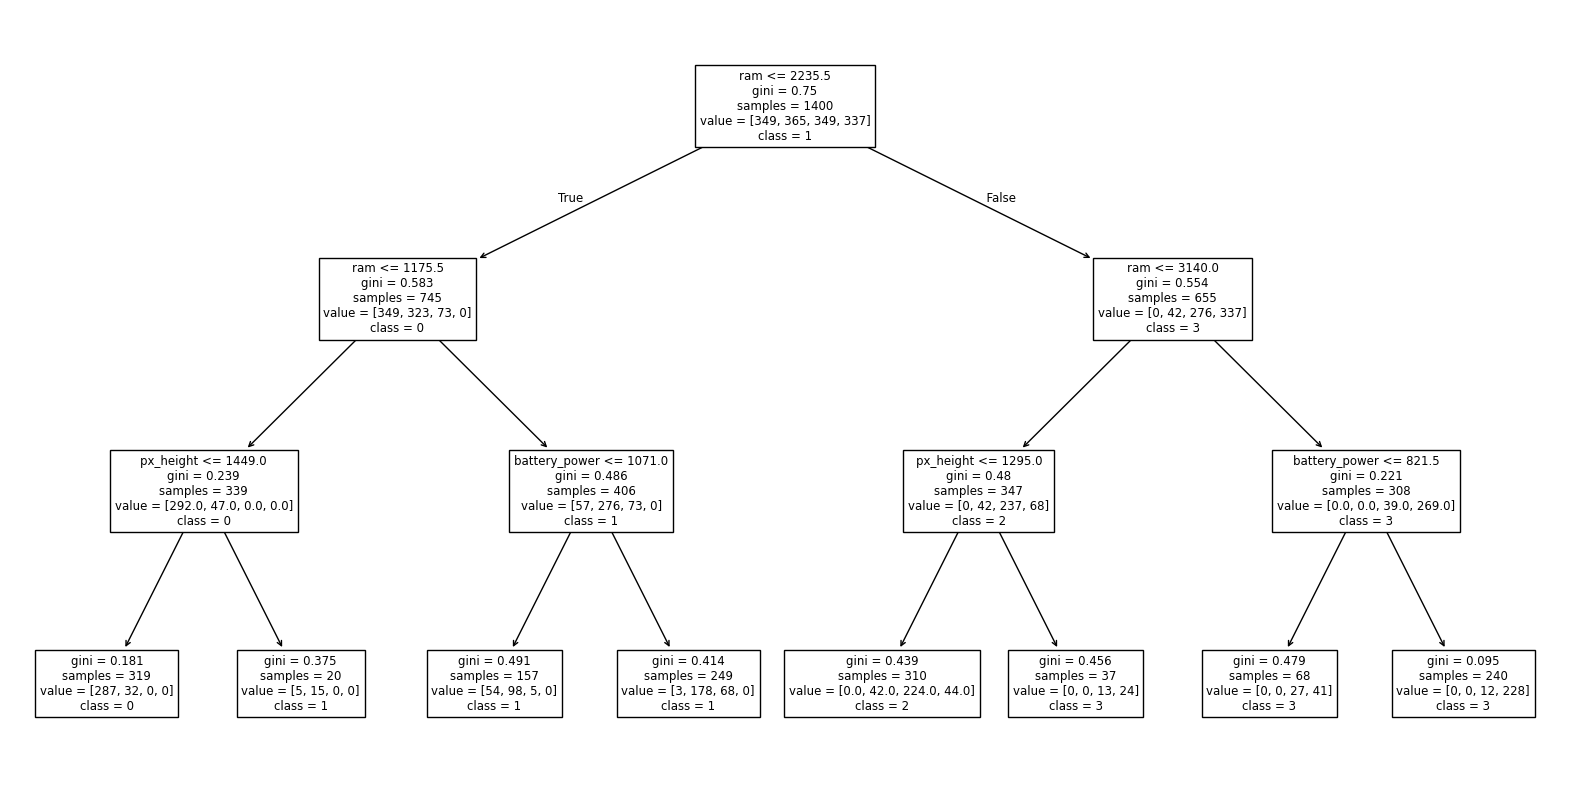

In [13]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=clf.feature_names_in_, class_names=clf.classes_.astype("str"));

# Нормализация с помощью StandardScaler и MinMaxScaler

Нормализация тренировочной и тестовой выборок с помощью `StandardScaler`.

In [14]:
standard_scaler = StandardScaler()
X_train_st = standard_scaler.fit_transform(X_train)
X_test_st = standard_scaler.transform(X_test)

Нормализация тренировочной и тестовой выборок с помощью `MinMaxScaler`.

In [15]:
min_max_scaler = MinMaxScaler()
X_train_mm = min_max_scaler.fit_transform(X_train)
X_test_mm = min_max_scaler.transform(X_test)

# Классификация с помощью деревьев решений нормализованных данных

Обучим классификатор `DecisionTreeClassifier` на тренировочной выборке с нормализацией `StandardScaler` и посмотрим точность.

In [16]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train_st, y_train)
clf.score(X_test_st, y_test)

0.7483333333333333

Обучим классификатор `DecisionTreeClassifier` на тренировочной выборке с нормализацией `MinMaxScaler` и посмотрим точность.

In [17]:
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train_mm, y_train)
clf.score(X_test_mm, y_test)

0.7483333333333333

Исходя из полученных значений метрик можно сделать вывод, что нормализация не влияет на деревья решений.

# Подбор значений гиперпараметров с помощью RandomizedSearchCV

Подберём значения гиперпараметров с помощью алгоритма `RandomizedSearchCV`, который рассматривает различные комбинации значений передаваемых гиперпараметров и выбирает такие, с которыми была достигнута наибольшая точность.

In [18]:
params = {"max_depth": [2, 3, 5, 7, 10],
          "max_features": range(1, 30),
          "min_samples_split": [3, 5, 10, 20],
          "min_samples_leaf": [1, 2, 10],
          "criterion": ["gini", "entropy"]}
best_clf = RandomizedSearchCV(DecisionTreeClassifier(random_state=0), params, n_iter=1000)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8133333333333334

Посмотрим, какие значения гиперпараметров оказались наилучшими.

In [19]:
best_clf.best_params_

{'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 18,
 'max_depth': 7,
 'criterion': 'entropy'}

Наилучшими значениями гиперпараметров оказываются:
- минимальное количество выборок, необходимое для разделения внутреннего узла, равно 10;
- минимальное количество выборок, необходимое для того, чтобы они находились в конечном узле, равно 1;
- количество признаков, которые следует учитывать при поиске наилучшего варианта разделения, равно 18;
- максимальная глубина дерева равна 7;
- лучшая функция для измерения качества разделения - энтропия.

Предскажем классы телефонов тестовой выборки и посмотрим результаты для каждого из классов.

In [20]:
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       151
           1       0.73      0.79      0.76       135
           2       0.71      0.77      0.74       151
           3       0.92      0.80      0.86       163

    accuracy                           0.81       600
   macro avg       0.82      0.81      0.81       600
weighted avg       0.82      0.81      0.82       600



Исходя из полученных значений метрик, принадлежность к классам 0 и 3 всё также предсказывается лучше, чем к 1 и 2.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

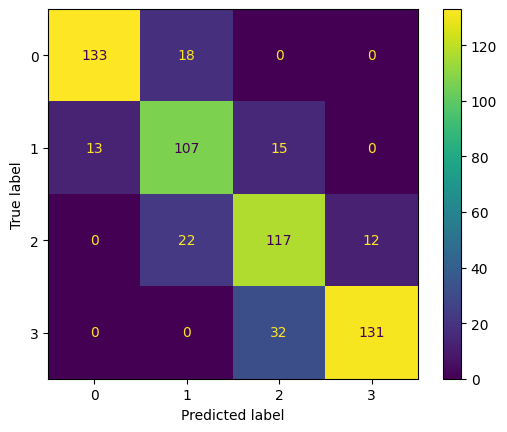

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что несколько телефонов каждого класса всё также определяются в "соседние" классы.

# Краткий вывод о классификации с помощью деревьев решений

Таким образом, к достоинствам деревьев решений можно отнести простоту представления решения в виде древовидной структуры, возможность решения как задач классификации, так и задач регрессии, возможность заполнения пропусков в данных наиболее вероятными значениями. К недостаткам можно отнести зависимость от метода построения и выбросов в обучающей выборке, а также склонность к переобучению. Т. к. распределение объектов по классам и распределение значений признаков равномерные, то деревья решений показывают высокую точность на данном наборе данных при подборе гиперпараметров.

# Применение ансамблевых методов на основе деревьев решений

## RandomForestClassifier (случайный лес)

Обучим классификатор `RandomForestClassifier` на тренировочной выборке и посмотрим точность.

In [22]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.875

Получаем, что случайный лес выдаёт точность на 6% выше, чем обычное дерево решений с подобранными гиперпараметрами.

Предскажем классы телефонов тестовой выборки и посмотрим результаты для каждого из классов.

In [23]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       151
           1       0.80      0.81      0.81       135
           2       0.82      0.77      0.80       151
           3       0.93      0.93      0.93       163

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.87      0.88      0.87       600



Исходя из полученных значений метрик, принадлежность к классам 0 и 3 всё также предсказывается лучше, чем к 1 и 2.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

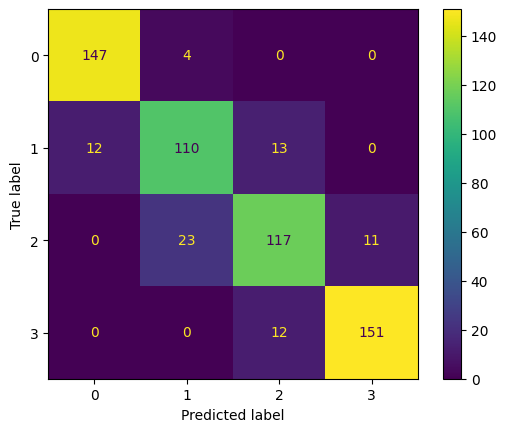

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что несколько телефонов каждого класса определяются в "соседние" классы, но их количество значительно уменьшилось.

## AdaBoostClassifier (адаптивный бустинг)

Обучим классификатор `AdaBoostClassifier` на тренировочной выборке и посмотрим точность.

In [25]:
estimator = DecisionTreeClassifier()
clf = AdaBoostClassifier(estimator, n_estimators=10, random_state=15)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.845

Получаем, что адаптивный бустинг выдаёт точность на 3% выше, чем обычное дерево решений с подобранными гиперпараметрами.

Предскажем классы телефонов тестовой выборки и посмотрим результаты для каждого из классов.

In [26]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.80      0.79      0.79       135
           2       0.78      0.78      0.78       151
           3       0.88      0.90      0.89       163

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600



Исходя из полученных значений метрик, принадлежность к классам 0 и 3 всё также предсказывается лучше, чем к 1 и 2.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

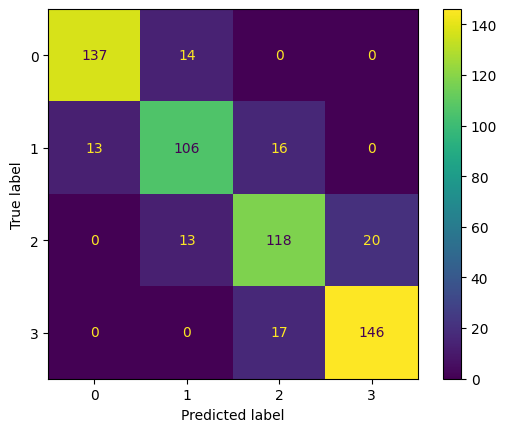

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что несколько телефонов каждого класса всё также определяются в "соседние" классы.

## GradientBoostingClassifier, HistGradientBoostingClassifier (градиентный бустинг)

Обучим классификатор `GradientBoostingClassifier` на тренировочной выборке и посмотрим точность.

In [28]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9116666666666666

Получаем, что градиентный бустинг выдаёт точность на 10% выше, чем обычное дерево решений с подобранными гиперпараметрами.

Предскажем классы телефонов тестовой выборки и посмотрим результаты для каждого из классов.

In [29]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       151
           1       0.87      0.87      0.87       135
           2       0.88      0.85      0.86       151
           3       0.93      0.95      0.94       163

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



Исходя из полученных значений метрик, принадлежность к классам 0 и 3 всё также предсказывается лучше, чем к 1 и 2.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

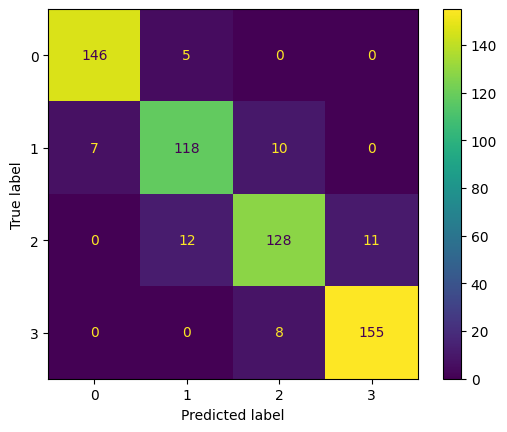

In [30]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что несколько телефонов каждого класса определяются в "соседние" классы, но их количество значительно уменьшилось.

Обучим классификатор `HistGradientBoostingClassifier` на тренировочной выборке и посмотрим точность.

In [31]:
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.91

Получаем, что градиентный бустинг на основе гистограммы выдаёт ту же точность, что и обычный градиентный бустинг. Их разница состоит в том, что засчёт использования гистограммы, данный алгоритм выполняется значительно быстрее, что можно заметить даже на этом относительно небольшом наборе данных (2000 записей).

Видно, что несколько телефонов каждого класса определяются в "соседние" классы, но их количество значительно уменьшилось.

## BaggingClassifier (бэггинг)

Данный алгоритм подбирает базовые классификаторы для каждого из случайных подмножеств исходного набора данных, а затем агрегирует их индивидуальные предсказания (либо путем голосования, либо путем усреднения) для формирования окончательного предсказания.

Обучим классификатор `BaggingClassifier` на тренировочной выборке и посмотрим точность.

In [32]:
estimator = DecisionTreeClassifier()
clf = BaggingClassifier(estimator, n_estimators=10, random_state=15)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8916666666666667

Получаем, что бэггинг выдаёт точность на 8% выше, чем обычное дерево решений с подобранными гиперпараметрами, и на 2% ниже, чем градиентый бустинг.

Предскажем классы телефонов тестовой выборки и посмотрим результаты для каждого из классов.

In [33]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       151
           1       0.86      0.88      0.87       135
           2       0.86      0.84      0.85       151
           3       0.91      0.91      0.91       163

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



Исходя из полученных значений метрик, принадлежность к классам 0 и 3 всё также предсказывается лучше, чем к 1 и 2.

Также, визуализируем результат работы классификатора с помощью матрицы спутанности.

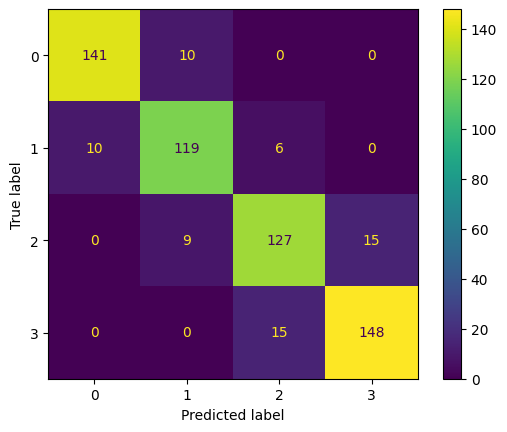

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Видно, что результат почти ничем не уступает градиентному бустингу.